<a href="https://colab.research.google.com/github/joseforneiro/DadosCovid19/blob/master/Trabalho_LabVI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segundo método de Série Temporal** (XGBoost)
link: [Documentação](https://xgboost.readthedocs.io/en/stable/)

In [1]:
# Importando o pandas
import pandas as pd
import numpy as np

In [2]:
# Biblioteca Python de plotagem 2d, que auxilia a biblioteca matemática NumPy
!pip install matplotlib
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Biblioteca estatística projetada para preencher o vazio nos recursos de análise de séries temporais do Python
!pip install pmdarima
from pmdarima import auto_arima # Ao inves de ficar testano os pdq o auto_arima ajuda a achar esses parâmetros sozinhos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from statsmodels.tsa.arima.model import ARIMA # Aqui tem muitos modelos de estatistica
from xgboost import XGBRegressor # Machine Learning utilizado
from sklearn.metrics import mean_squared_error # função de cálculo de erro quadrático

In [5]:
# Etapa 1
# Importando o primeiro arquivo .csv (dados de vacinação contra Covid19) e mostrando as 5 primeiras linhas

url = 'https://raw.githubusercontent.com/joseforneiro/DadosCovid19/master/CovidVaccinations.csv'
data = pd.read_csv(url, sep=',')
data.head(5)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
# Contando quantas linhas tem a base de dados
data[data.columns[0]].count()

214716

In [7]:
# Filtrando as linhas da coluna location que contenham a palavra Brazil
data = data[data['location'].str.contains('Brazil')]
data.head(5)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
26699,BRA,South America,Brazil,26-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
26700,BRA,South America,Brazil,27-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
26701,BRA,South America,Brazil,28-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
26702,BRA,South America,Brazil,29-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.891915
26703,BRA,South America,Brazil,01-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [8]:
# Contando quantas linhas tem a base de dados
data[data.columns[0]].count()

925

In [9]:
# Deixando somente as colunas necessárias
data = data[['location','date','new_tests','people_vaccinated']]
data.head(5)

,location,date,new_tests,people_vaccinated
26699,Brazil,26-02-20,NaN,NaN
26700,Brazil,27-02-20,NaN,NaN
26701,Brazil,28-02-20,NaN,NaN
26702,Brazil,29-02-20,NaN,NaN
26703,Brazil,01-03-20,NaN,NaN


In [10]:
# Printando os tipos de dados das colunas
print(data.dtypes)

location              object
date                  object
new_tests            float64
people_vaccinated    float64
dtype: object


In [11]:
# Etapa 2
# Importando o segundo arquivo .csv (dados de infecção por Covid19) e mostrando as 5 primeiras linhas
url = 'https://raw.githubusercontent.com/joseforneiro/DadosCovid19/master/CovidDeaths.csv'
data2 = pd.read_csv(url, sep=',')
data2.head(5)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
0,AFG,Asia,Afghanistan,24-02-20,40099462.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Contando quantas linhas tem a base de dados
data2[data2.columns[0]].count()

214716

In [13]:
# Filtrando as linhas da coluna location que contenham a palavra Brazil
data2 = data2[data2['location'].str.contains('Brazil')]
data2.head(5)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
26699,BRA,South America,Brazil,26-02-20,214326223.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26700,BRA,South America,Brazil,27-02-20,214326223.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26701,BRA,South America,Brazil,28-02-20,214326223.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26702,BRA,South America,Brazil,29-02-20,214326223.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26703,BRA,South America,Brazil,01-03-20,214326223.0,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Contando quantas linhas tem a base de dados
data2[data2.columns[0]].count()

925

In [15]:
# Deixando somente as colunas necessárias
data2 = data2[['location','date','new_deaths']]
data2.head(5)

,location,date,new_deaths
26699,Brazil,26-02-20,NaN
26700,Brazil,27-02-20,NaN
26701,Brazil,28-02-20,NaN
26702,Brazil,29-02-20,NaN
26703,Brazil,01-03-20,NaN


In [16]:
# Printando os tipos de dados das colunas
print(data2.dtypes)

location       object
date           object
new_deaths    float64
dtype: object


In [17]:
# Unindo as duas bases de dados
datatotal = pd.merge(data, data2, how = 'inner', on = ('location', 'date'))
datatotal.head(5)

,location,date,new_tests,people_vaccinated,new_deaths
0,Brazil,26-02-20,NaN,NaN,NaN
1,Brazil,27-02-20,NaN,NaN,NaN
2,Brazil,28-02-20,NaN,NaN,NaN
3,Brazil,29-02-20,NaN,NaN,NaN
4,Brazil,01-03-20,NaN,NaN,NaN


In [18]:
# Alterando o nome das colunas
datatotal = datatotal.rename(columns = {'location':'pais', 'date':'datas', 'new_tests':'novos_testes', 'people_vaccinated':'pessoas_vacinadas', 'new_deaths':'novas_mortes'})
datatotal.head(5)

,pais,datas,novos_testes,pessoas_vacinadas,novas_mortes
0,Brazil,26-02-20,NaN,NaN,NaN
1,Brazil,27-02-20,NaN,NaN,NaN
2,Brazil,28-02-20,NaN,NaN,NaN
3,Brazil,29-02-20,NaN,NaN,NaN
4,Brazil,01-03-20,NaN,NaN,NaN


In [19]:
# Retirando a Coluna país:
datatotal = datatotal.drop(columns=['pais'])
datatotal.head(10)

,datas,novos_testes,pessoas_vacinadas,novas_mortes
0,26-02-20,NaN,NaN,NaN
1,27-02-20,NaN,NaN,NaN
2,28-02-20,NaN,NaN,NaN
3,29-02-20,NaN,NaN,NaN
4,01-03-20,NaN,NaN,NaN
5,02-03-20,NaN,NaN,NaN
6,03-03-20,NaN,NaN,NaN
7,04-03-20,NaN,NaN,NaN
8,05-03-20,NaN,NaN,NaN
9,06-03-20,NaN,NaN,NaN


In [20]:
# Substituindo NAN por 0:
datatotal = datatotal.fillna (0)
datatotal.head(5)

,datas,novos_testes,pessoas_vacinadas,novas_mortes
0,26-02-20,0.0,0.0,0.0
1,27-02-20,0.0,0.0,0.0
2,28-02-20,0.0,0.0,0.0
3,29-02-20,0.0,0.0,0.0
4,01-03-20,0.0,0.0,0.0


In [21]:
# Contando quantas linhas tem a base de dados
datatotal[datatotal.columns[0]].count()

925

In [22]:
# Printando os tipos de dados das colunas
print(datatotal.dtypes)

datas                 object
novos_testes         float64
pessoas_vacinadas    float64
novas_mortes         float64
dtype: object


In [23]:
# Alterando o formato da data
datatotal['datas'] = datatotal['datas'].str.replace('-','/')
datatotal.head(5)

,datas,novos_testes,pessoas_vacinadas,novas_mortes
0,26/02/20,0.0,0.0,0.0
1,27/02/20,0.0,0.0,0.0
2,28/02/20,0.0,0.0,0.0
3,29/02/20,0.0,0.0,0.0
4,01/03/20,0.0,0.0,0.0


In [24]:
# Converte data de string para datetime e transforma em índice
datatotal['datas'] = pd.to_datetime(datatotal['datas'], format='%d/%m/%y')
datatotal = datatotal.set_index('datas')
datatotal = datatotal.asfreq('D')
datatotal = datatotal.sort_index()

datatotal.head(10)

,novos_testes,pessoas_vacinadas,novas_mortes
datas,,,
2020-02-26,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0
2020-03-02,0.0,0.0,0.0
2020-03-03,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0
2020-03-05,0.0,0.0,0.0


In [25]:
# Substituindo os valores 0 da coluna pessoas_vacinadas pelo valor da linhha anterior
last_value = 0
for index in datatotal.index:
  if datatotal["pessoas_vacinadas"][index] > 0:
    last_value = datatotal["pessoas_vacinadas"][index]
  if datatotal["pessoas_vacinadas"][index] == 0:
    datatotal.at[index, "pessoas_vacinadas"] = last_value
datatotal.head(10)

,novos_testes,pessoas_vacinadas,novas_mortes
datas,,,
2020-02-26,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0
2020-03-02,0.0,0.0,0.0
2020-03-03,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0
2020-03-05,0.0,0.0,0.0


In [26]:
# Verificando se o nosso indice realmente está no formato DatetimeIndex
datatotal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 925 entries, 2020-02-26 to 2022-09-07
Freq: D
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   novos_testes       925 non-null    float64
 1   pessoas_vacinadas  925 non-null    float64
 2   novas_mortes       925 non-null    float64
dtypes: float64(3)
memory usage: 61.2 KB


In [27]:
# Fazendo a análise exploratória de dados
# mean = média, 50% = mediana, 25% e 75% = quartiz, min = valor mínimo, max = valor máximo, std
datatotal.describe()

,novos_testes,pessoas_vacinadas,novas_mortes
count,9.250000e+02,9.250000e+02,925.000000
mean,4.000594e+04,8.120840e+07,740.008649
std,2.173143e+05,8.038063e+07,744.176169
min,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,198.000000
50%,0.000000e+00,4.785203e+07,540.000000
75%,1.603900e+04,1.675473e+08,1061.000000
max,2.920329e+06,1.866245e+08,4148.000000


In [28]:
# Verificando o meu indice mínimo e máximo
datatotal.index.min(), datatotal.index.max()

(Timestamp('2020-02-26 00:00:00', freq='D'),
 Timestamp('2022-09-07 00:00:00', freq='D'))

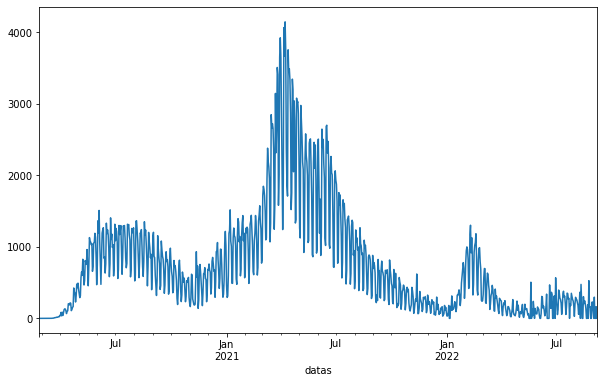

In [29]:
# Plotanto o Gráfico de Mortes Diárias por Covid19
datatotal['novas_mortes'].plot(figsize=(10,6))



---


#Prevendo com Arima



<Figure size 576x432 with 0 Axes>

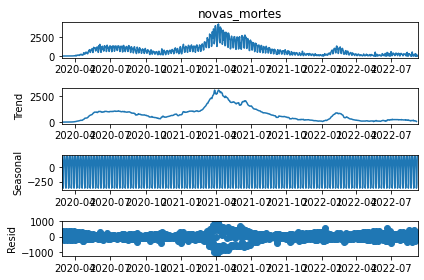

In [30]:
# Primeiro, vamos decompor a série pra avaliar tendência
# Sazonalidade e resíduo
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(datatotal['novas_mortes'])

fig = plt.figure(figsize=(8, 6))  
fig = resultado.plot()

In [31]:
# Teste de estacionariedade. 
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(datatotal['novas_mortes'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-2.265759865036348
p-valor:0.18324894022639243



Ou seja, a série não é realmente estacionária (p-valor >0.05, não podemos rejeitar a hipótese nula)

In [32]:
# Auto ARIMA nos ajuda a buscar os melhores parâmetros
fit_arima = auto_arima(datatotal['novas_mortes'], d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True, 
                           m=6, 
                           D=1, 
                           start_P=1, 
                           start_Q=1, 
                           max_P=2, 
                           max_Q=2, 
                           information_criterion='aic',
                           trace=True, 
                           error_action='ignore', 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=13924.683, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=13856.974, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=13891.163, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=13682.266, Time=0.69 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=3.85 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=13682.625, Time=0.63 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=13626.666, Time=1.99 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=13654.113, Time=0.83 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=8.05 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=3.79 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=13553.500, Time=3.40 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=13649.898, Ti

No código acima o arima deu uma tunada nos parâmetros e nos deu o melhor modelo para utilizar

In [33]:
# Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX 
# (versão do arima com parametros para sazonalidade)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(datatotal['novas_mortes'],order=(3,1,2),  seasonal_order=(2, 1, 1, 6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [34]:
# resultados do modelo SARIMAX(3,1,2)
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        novas_mortes   No. Observations:                  925
Model:             SARIMAX(3, 1, 2)x(2, 1, [1], 6)   Log Likelihood               -6461.197
Date:                             Thu, 17 Nov 2022   AIC                          12940.393
Time:                                     01:37:03   BIC                          12983.793
Sample:                                 02-26-2020   HQIC                         12956.957
                                      - 09-07-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9719      0.061     16.050      0.000       0.853       1.091
ar.L2         -0.6505      0.072     -9.050      0.000      -0.791      -0.510
ar.L3         -0.2789      0.058     -4.790      0.000      -0.393      -0.165
ma.L1         -1.3567      0.029    -46.837      0.000      -1.413      -1.300
ma.L2          0.9096      0.029     31.435      0.000       0.853       0.966
ar.S.L6       -0.3956      0.052     -7.594      0.000      -0.498      -0.293
ar.S.L12      -0.5622      0.060     -9.384      0.000      -0.680      -0.445
ma.S.L6       -0.8945      0.037    -23.972      0.000      -0.968      -0.821
sigma2      1.404e+05   7498.658     18.725      0.000    1.26e+05    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                  12.47   Jarque-Bera (JB):              2257.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.03
Prob(H) (two-sided):                  0.69   Kurtosis:                        10.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ar.L1 = coeficiente do dia anterior
ar.L2 = coeficiente de dois dias anteriores
ma.L1 = Média movel do dia anterior

In [35]:
# Vamos realizar um "backtesting" com predições de valores dos 200 dias anteriores
predicoes = resultado_sarimax.get_prediction(start=-200)
predicao_media = predicoes.predicted_mean

In [36]:
# intervalo de confiança
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(-209.2668900781041, 1259.576964159693)

In [37]:
predicao_media[0]

525.1550370407945

Obtemos então o intervalo de confiança de -209 a 1256 com uma média de 525

In [38]:
# Aqui estamos pegando as datas previstas e as datas totais
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(datatotal.index)

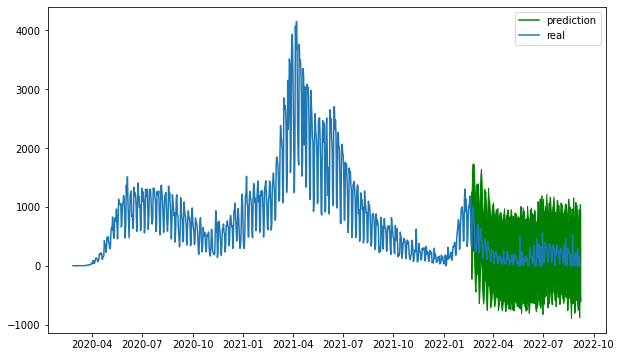

In [39]:
# Plotando o gráfico das predições dos 200 dias para trás
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='green',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='green')
plt.plot(datas, datatotal['novas_mortes'].values, label='real')
plt.legend()
plt.show()



---


#Prevendo com XGBoost: <br>
Só consegue prever amanhã os dados que eu tenho disponível hoje

In [40]:
# Separando o treino e Validação
treino = datatotal.loc[datatotal.index <= '2020-09-12']
validacao = datatotal.loc[datatotal.index > '2020-09-12']

treino.shape, validacao.shape

((200, 3), (725, 3))

In [41]:
# Pegando as datas iniciais e finais de treino
treino.index.min(), treino.index.max()

(Timestamp('2020-02-26 00:00:00', freq='D'),
 Timestamp('2020-09-12 00:00:00', freq='D'))

In [42]:
# Pegando as datas iniciais e finais de validação
validacao.index.min(), validacao.index.max()

(Timestamp('2020-09-13 00:00:00', freq='D'),
 Timestamp('2022-09-07 00:00:00', freq='D'))

Criando a variável target (alvo) e a lagged (atrasada)
<br>Eu tempo prever o número de mortes amanhã tendo com os dados de ontem

In [43]:
# Mostrando o intervalo de treino (valores do dia)
treino['novas_mortes']

datas
2020-02-26       0.0
2020-02-27       0.0
2020-02-28       0.0
2020-02-29       0.0
2020-03-01       0.0
               ...  
2020-09-08     525.0
2020-09-09    1157.0
2020-09-10     974.0
2020-09-11     848.0
2020-09-12     767.0
Freq: D, Name: novas_mortes, Length: 200, dtype: float64

In [44]:
# Aqui ele vai trazer o número de mortes de ontem para hoje 
# O último dia é NaN pois eu não tenho o amanhã
# Aqui só mostra o que essa variável faz
treino['novas_mortes'].shift(-1)

datas
2020-02-26       0.0
2020-02-27       0.0
2020-02-28       0.0
2020-02-29       0.0
2020-03-01       0.0
               ...  
2020-09-08    1157.0
2020-09-09     974.0
2020-09-10     848.0
2020-09-11     767.0
2020-09-12       NaN
Freq: D, Name: novas_mortes, Length: 200, dtype: float64

In [45]:
# Criando uma variável target (o que eu quero prever) para treino através do número de mortes do dia de amanhã
treino['target'] = treino['novas_mortes'].shift(-1)
treino.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,novos_testes,pessoas_vacinadas,novas_mortes,target
datas,,,,
2020-02-26,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0
2020-03-02,0.0,0.0,0.0,0.0
2020-03-03,0.0,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0,0.0
2020-03-05,0.0,0.0,0.0,0.0


In [46]:
# Se eu pegar o tail vou verificar que o último dia é NaN pois eu não tenho o amanhã
treino.tail()

,novos_testes,pessoas_vacinadas,novas_mortes,target
datas,,,,
2020-09-08,0.0,0.0,525.0,1157.0
2020-09-09,0.0,0.0,1157.0,974.0
2020-09-10,0.0,0.0,974.0,848.0
2020-09-11,0.0,0.0,848.0,767.0
2020-09-12,29103.0,0.0,767.0,NaN


In [47]:
# Aqui eu tiro a última linha que tem o NaN
treino = treino.dropna()
treino.tail()

,novos_testes,pessoas_vacinadas,novas_mortes,target
datas,,,,
2020-09-07,0.0,0.0,320.0,525.0
2020-09-08,0.0,0.0,525.0,1157.0
2020-09-09,0.0,0.0,1157.0,974.0
2020-09-10,0.0,0.0,974.0,848.0
2020-09-11,0.0,0.0,848.0,767.0


In [48]:
# Criando o target para a validação
validacao['target'] = validacao['novas_mortes'].shift(-1)
validacao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,novos_testes,pessoas_vacinadas,novas_mortes,target
datas,,,,
2020-09-13,0.0,0.0,405.0,458.0
2020-09-14,0.0,0.0,458.0,1082.0
2020-09-15,0.0,0.0,1082.0,962.0
2020-09-16,0.0,0.0,962.0,869.0
2020-09-17,17883.0,0.0,869.0,828.0


In [49]:
# Se eu pegar o tail vou verificar que o último dia é NaN pois eu não tenho o amanhã
validacao.tail()

,novos_testes,pessoas_vacinadas,novas_mortes,target
datas,,,,
2022-09-03,0.0,186578811.0,0.0,0.0
2022-09-04,0.0,186583216.0,0.0,163.0
2022-09-05,0.0,186590349.0,163.0,0.0
2022-09-06,0.0,186618522.0,0.0,0.0
2022-09-07,0.0,186624508.0,0.0,NaN


In [50]:
# Aqui eu tiro a última linha que tem o NaN
validacao = validacao.dropna()
validacao.tail()

,novos_testes,pessoas_vacinadas,novas_mortes,target
datas,,,,
2022-09-02,0.0,186558432.0,297.0,0.0
2022-09-03,0.0,186578811.0,0.0,0.0
2022-09-04,0.0,186583216.0,0.0,163.0
2022-09-05,0.0,186590349.0,163.0,0.0
2022-09-06,0.0,186618522.0,0.0,0.0


In [51]:
# Separando em treino e validação o X e Y
X_treino = treino.loc[:, ['novas_mortes']].values
y_treino = treino.loc[:, ['target']].values
X_validacao = validacao.loc[:, ['novas_mortes']].values
y_validacao = validacao.loc[:, ['target']].values

X_treino.shape, y_treino.shape, X_validacao.shape, y_validacao.shape

((199, 1), (199, 1), (724, 1), (724, 1))

In [52]:
# Fazendo o XGBRegressor, utilizando o squarederror como métrica para reduzir
# n_estimators: Número de árvores impulsionadas por gradiente. Equivalente ao número de rodadas de reforço.
modelo_xgb_um_dia = XGBRegressor(objective="reg:squarederror", n_estimators=35)
modelo_xgb_um_dia.fit(X_treino, y_treino)

XGBRegressor(n_estimators=35, objective='reg:squarederror')

In [53]:
# Aqui pegamos o valor do último dia de treino para podermos fazer nossa previsão para ver se está acertando
ultima_linha = treino.iloc[-1]
ultima_linha['novas_mortes']

848.0

In [54]:
# Atribuindo o valor do último dia de treino a variável
ultimo_valor_treino = np.array([ultima_linha['novas_mortes']])

In [55]:
# Fazendo a predição para o último dia de treino
predicao = modelo_xgb_um_dia.predict([ultimo_valor_treino])
predicao

array([765.24524], dtype=float32)

In [56]:
# O mean_squared_errorfunção calcula o erro quadrático médio , uma métrica de risco correspondente ao valor esperado do erro quadrático (quadrático) ou perda.
mean_squared_error(ultimo_valor_treino, predicao)

6848.350425496697

In [57]:
# Pegando o valor do segundo dia de validação
X_validacao[2]

array([1082.])

In [58]:
# Fazendo a predição para o segundo dia de validação
predicao = modelo_xgb_um_dia.predict([X_validacao[2]])
predicao

array([925.65924], dtype=float32)

In [59]:
# O mean_squared_error função calcula o erro quadrático médio , uma métrica de risco correspondente ao valor esperado do erro quadrático (quadrático) ou perda.
# Quanto alguns resultados passam a se afastar de uma média aguardada inicialmente.
mean_squared_error(X_validacao[4], predicao)

3210.2695592679083